# 🧪 Análise da Qualidade de Vinhos com Otimização e Comparação de Modelos

### 📄 Descrição do Projeto:

🎯 **Objetivo do Projeto**

Este projeto tem como objetivo a classificação binária da qualidade de vinhos tintos com base em atributos físico-químicos. A análise envolve o uso de técnicas de machine learning supervisionado com os seguintes passos principais:

* Tradução das variáveis para o português

* Criação da variável-alvo binária ('bom' ou 'ruim')

* Normalização dos dados

* Balanceamento da base usando SMOTE

* Avaliação de 4 algoritmos: KNN, Árvore de Decisão, Naive Bayes e SVM

* Otimização de hiperparâmetros com GridSearchCV

* Métrica principal: F1-score

* Comparação visual entre os modelos

* Exportação do melhor modelo para uso futuro

O modelo que obteve o melhor desempenho foi salvo como `melhor_modelo_vinho.pkl` para aplicação prática em sistemas de predição.

### 1) 📥 Importação das bibliotecas

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pickle
from google.colab import files

### 2) 📄 Carregamento do dataset


In [96]:
#  Carregar o dataset de vinhos
url = "https://raw.githubusercontent.com/keelcoutinho/smart-wine-classifier/refs/heads/main/machineLearning/data/winequality-red.csv"

# Ler o arquivo CSV
df = pd.read_csv(url, sep=';')

# Exibir as 5 primeiras linhas
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 3)  🌎 Tradução das colunas

In [97]:
# Alterar nomeclatura das colunas
df.rename(columns={
    'fixed acidity': 'acidez_fixa',
    'volatile acidity': 'acidez_volatil',
    'citric acid': 'acido_citrico',
    'residual sugar': 'acucar_residual',
    'chlorides': 'cloretos',
    'free sulfur dioxide': 'dioxido_enxofre_livre',
    'total sulfur dioxide': 'dioxido_enxofre_total',
    'density': 'densidade',
    'pH': 'ph',
    'sulphates': 'sulfatos',
    'alcohol': 'teor_alcoolico',
    'quality': 'qualidade'
}, inplace=True)

# Verificar se foi renomeado corretamente
df.columns

Index(['acidez_fixa', 'acidez_volatil', 'acido_citrico', 'acucar_residual',
       'cloretos', 'dioxido_enxofre_livre', 'dioxido_enxofre_total',
       'densidade', 'ph', 'sulfatos', 'teor_alcoolico', 'qualidade'],
      dtype='object')

### 4) 🧼 Criação do rótulo binário 'bom'

In [98]:
# Se a qualidade for maior ou igual a 7, consideramos o vinho como "bom" (1), senão "ruim" (0)
df['classificacao'] = df['qualidade'].apply(lambda x: 1 if x >= 7 else 0)

print("Balanceamento dos dados:")
print(df['classificacao'].value_counts())


Balanceamento dos dados:
classificacao
0    1382
1     217
Name: count, dtype: int64


### 5) 📊 Separação das variáveis

In [99]:
# Separar os dados em atributos (X) e o que queremos prever (y).
X = df.drop(['qualidade', 'classificacao'], axis=1)
y = df['classificacao']

df.head()

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,ph,sulfatos,teor_alcoolico,qualidade,classificacao
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


### 6) ✂️ Separação treino/teste


In [100]:
# Dividir os dados em dois grupos: para treinar o modelo e para testá-lo.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

### 7) ⚖️ Balanceamento com SMOTE

In [101]:
# Corrigir o desequilíbrio entre as classes criando exemplos sintéticos da classe minoritária.
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


### 8) 🤖 Modelos e hiperparâmetros


In [102]:
# Escolhe quatro algoritmos e os parâmetros para testar.
modelos_parametros = {
    'KNN': {
        'modelo': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 7, 9]}
    },
    'Árvore de Decisão': {
        'modelo': DecisionTreeClassifier(random_state=42),
        'params': {'max_depth': [3, 5, 10, None]}
    },
    'Naive Bayes': {
        'modelo': GaussianNB(),
        'params': {}
    },
    'SVM': {
        'modelo': SVC(probability=True, random_state=42),
        'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

### 9) 🧪 Treinamento e Avaliação com GridSearchCV

🔍 Treinando e otimizando: KNN
✅ Melhor Parâmetro: {'modelo__n_neighbors': 3}
✅ Acurácia: 0.84375
✅ F1-score: 0.576271186440678
🧾 Relatório:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       277
           1       0.45      0.79      0.58        43

    accuracy                           0.84       320
   macro avg       0.71      0.82      0.74       320
weighted avg       0.89      0.84      0.86       320



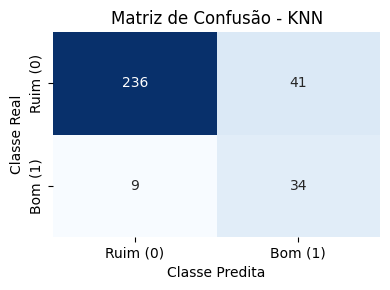

🔍 Treinando e otimizando: Árvore de Decisão
✅ Melhor Parâmetro: {'modelo__max_depth': None}
✅ Acurácia: 0.86875
✅ F1-score: 0.5961538461538461
🧾 Relatório:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       277
           1       0.51      0.72      0.60        43

    accuracy                           0.87       320
   macro avg       0.73      0.81      0.76       320
weighted avg       0.89      0.87      0.88       320



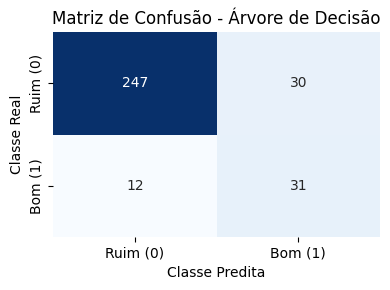

🔍 Treinando e otimizando: Naive Bayes
✅ Melhor Parâmetro: {}
✅ Acurácia: 0.775
✅ F1-score: 0.4626865671641791
🧾 Relatório:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86       277
           1       0.34      0.72      0.46        43

    accuracy                           0.78       320
   macro avg       0.64      0.75      0.66       320
weighted avg       0.87      0.78      0.80       320



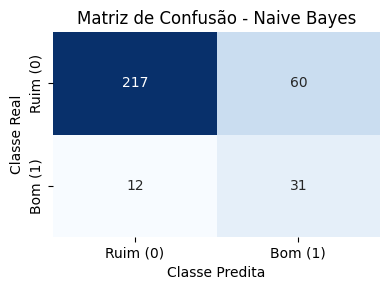

🔍 Treinando e otimizando: SVM
✅ Melhor Parâmetro: {'modelo__C': 10, 'modelo__kernel': 'rbf'}
✅ Acurácia: 0.890625
✅ F1-score: 0.6464646464646465
🧾 Relatório:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       277
           1       0.57      0.74      0.65        43

    accuracy                           0.89       320
   macro avg       0.76      0.83      0.79       320
weighted avg       0.91      0.89      0.90       320



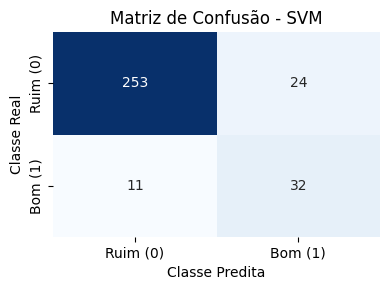

In [103]:
# Treinar e testar várias combinações de parâmetros para cada modelo
resultados = {}

for nome, config in modelos_parametros.items():
    print(f"🔍 Treinando e otimizando: {nome}")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('modelo', config['modelo'])
    ])

    grid = GridSearchCV(pipeline, param_grid={f'modelo__{k}': v for k, v in config['params'].items()},
                        scoring='f1', cv=5, n_jobs=-1)

    grid.fit(X_train_bal, y_train_bal)
    y_pred = grid.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Exibir métricas e matriz de confusão
    print("✅ Melhor Parâmetro:", grid.best_params_)
    print("✅ Acurácia:", acc)
    print("✅ F1-score:", f1)
    print("🧾 Relatório:")
    print(classification_report(y_test, y_pred, zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Ruim (0)', 'Bom (1)'],
                yticklabels=['Ruim (0)', 'Bom (1)'])
    plt.title(f'Matriz de Confusão - {nome}')
    plt.xlabel('Classe Predita')
    plt.ylabel('Classe Real')
    plt.tight_layout()
    plt.show()

    resultados[nome] = {
        'modelo': grid.best_estimator_,
        'acuracia': acc,
        'f1': f1
    }


### 10) 📈 Comparação gráfica dos modelos

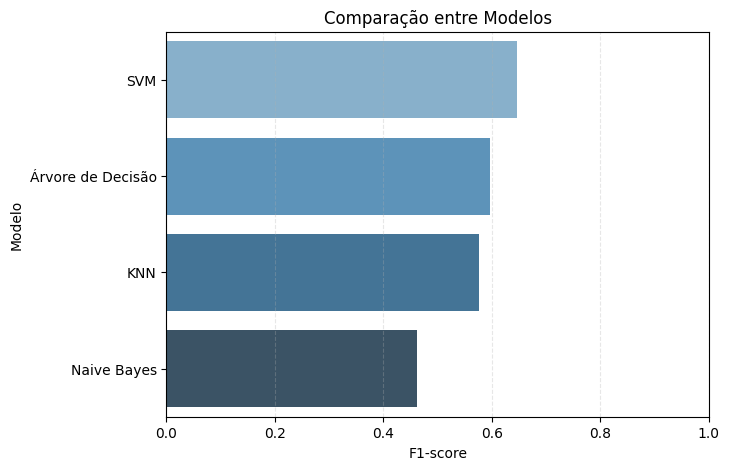

In [104]:
# Ordenar os modelos por F1-score decrescente
dados_funil = sorted(resultados.items(), key=lambda x: x[1]['f1'], reverse=True)
modelos = [x[0] for x in dados_funil]
f1_scores = [x[1]['f1'] for x in dados_funil]

plt.figure(figsize=(7, 5))
sns.barplot(y=modelos, x=f1_scores, palette="Blues_d")
plt.title('Comparação entre Modelos')
plt.xlabel('F1-score')
plt.ylabel('Modelo')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()

### 11) 🏆 Melhor modelo (por F1-score)

In [105]:
# Selecionar o modelo com maior F1-score.
melhor_modelo = max(resultados.items(), key=lambda x: x[1]['f1'])
print(f"🏆 Melhor modelo: {melhor_modelo[0]} com F1-score = {melhor_modelo[1]['f1']:.4f}")

🏆 Melhor modelo: SVM com F1-score = 0.6465


### 12) 💾 Salvando o melhor modelo em um arquivo .pkl

In [106]:
with open('melhor_modelo_vinho.pkl', 'wb') as arquivo:
    pickle.dump(melhor_modelo[1]['modelo'], arquivo)
print("💾 Modelo salvo como 'melhor_modelo_vinho.pkl'")

💾 Modelo salvo como 'melhor_modelo_vinho.pkl'


### 13) 🔄 Carregando o modelo e simulando uma nova predição

In [107]:
# Usar o modelo salvo para prever a qualidade de um vinho novo.
with open("melhor_modelo_vinho.pkl", "rb") as f:
    modelo_carregado = pickle.load(f)

# Criar um DataFrame com as colunas exatamente na mesma ordem
exemplo_manual = pd.DataFrame([{
    'acidez_fixa': 6.7,
    'acidez_volatil': 0.37,
    'acido_citrico': 0.44,
    'acucar_residual': 2.4,
    'cloretos': 0.061,
    'dioxido_enxofre_livre': 24,
    'dioxido_enxofre_total': 34,
    'densidade': 0.999,
    'ph': 3.29,
    'sulfatos': 0.8,
    'teor_alcoolico': 11.6,
}])

predicao = modelo_carregado.predict(exemplo_manual)
print("🔮 Predição para novo vinho:", "BOM" if predicao[0] == 1 else "RUIM")

🔮 Predição para novo vinho: BOM


### 14) ▶️ Baixar o arquivo no Colab:

In [109]:
files.download('melhor_modelo_vinho.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>